# Import all necessary packages

In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import pandas as pd
from numpy import asarray


# Skill & Importance level data importation

In [2]:
# Got a little help from this website:
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

# Specify the directory of all of our Skill csv's
directory = 'data/'

# Create a list to put all of our dataframes in
li = []

# Loop through every image in the directory
for filename in os.listdir(directory):
    # Skip the .DS_Store in the directory:
    if '.csv' in filename:
        # Create a dataframe file
        df = pd.read_csv(directory + filename, header = 0)
        # Attribute the name of the skill to a particular column so that we can concatenate later
        # Split up to -4, so that we don't include the '.csv' at the end of the filename
        df['Skill'] = filename[:-4]
        li.append(df)

# Concatenate the dataframes by column
frame = pd.concat(li, axis = 0, ignore_index = True)

# Convert column 'Importance' of the dataframe to dtype of int
# We cannot use 'Level', because one particular entry of 'Level' is equal to not-available,
# but all entries of 'Importance' is available
frame["Importance"] = pd.to_numeric(frame["Importance"])

# Check the heading rows of the dataframe
frame.head()

,Importance,Level,Code,Occupation,Skill
0,97,80,21-1014.00,Mental Health Counselors,Social_Perceptiveness
1,94,76,19-3033.00,Clinical and Counseling Psychologists,Social_Perceptiveness
2,88,77,29-1223.00,Psychiatrists,Social_Perceptiveness
3,85,82,21-1013.00,Marriage and Family Therapists,Social_Perceptiveness
4,81,77,21-2011.00,Clergy,Social_Perceptiveness


# Job name & Earnings data importation (Crawled)

In [3]:
job_earnings_data = pd.read_csv('job_earnings_data.csv', header = 0)
job_earnings_data.head()

,Job Name,Annual Earnings
0,Veterinarians,99250.0
1,Mental Health Counselors,47660.0
2,Software Developers,110140.0
3,Private Detectives and Investigators,53320.0
4,"Media and Communication Workers, All Other",49730.0


# Combining data sets, and a simple linear model

In [4]:
# Create a duplicate dataframe that contains the sum of the importance column's values,
# summed for the occupation that it belongs to
dff = frame.groupby(["Occupation"]).Importance.sum().reset_index()
dff.head()

,Occupation,Importance
0,Actuaries,465
1,Acute Care Nurses,225
2,Adhesive Bonding Machine Operators and Tenders,72
3,"Administrative Law Judges, Adjudicators, and H...",399
4,Administrative Services Managers,75


In [5]:
# Standardize the importance column, this will be done by dividing each importance value,
# by the sum of importance value for the job it is attributed to (from the previous block)
importance_standardized = []

for row in frame.iloc():
    # For every row, calculate the standardized importance values and append to list
    importance_standardized.append(row.Importance / dff.Importance[dff['Occupation'] == row.Occupation])

# Extract the values from the pandas series object
for i in range(len(importance_standardized)):
    importance_standardized[i] = importance_standardized[i].item()

# Assign this column into the dataframe as a new column
frame['Standardized Importance (by Occupation)'] = importance_standardized

# Display frame to take a look
frame.head()

,Importance,Level,Code,Occupation,Skill,Standardized Importance (by Occupation)
0,97,80,21-1014.00,Mental Health Counselors,Social_Perceptiveness,0.279539
1,94,76,19-3033.00,Clinical and Counseling Psychologists,Social_Perceptiveness,0.270115
2,88,77,29-1223.00,Psychiatrists,Social_Perceptiveness,0.153846
3,85,82,21-1013.00,Marriage and Family Therapists,Social_Perceptiveness,0.251479
4,81,77,21-2011.00,Clergy,Social_Perceptiveness,0.132787


In [6]:
# Create a new array to be added as a new column to the df
earnings_by_frame = []

# Fill this df by obtaining earnings data based on row sequence of frame
for row in frame.iloc():
    # For every row, multiply the skill's standardized importance by the earnings of the job the skill attributes to
    earnings_by_frame.append(job_earnings_data.loc[job_earnings_data['Job Name'] == row.Occupation, 'Annual Earnings'].item())

# Assert they are of same length
assert(len(earnings_by_frame) == len(frame))

# Append the array to our dataframe
frame['Annual Earning of Job'] = earnings_by_frame

# Display frame to take a look
frame.head()

,Importance,Level,Code,Occupation,Skill,Standardized Importance (by Occupation),Annual Earning of Job
0,97,80,21-1014.00,Mental Health Counselors,Social_Perceptiveness,0.279539,47660.0
1,94,76,19-3033.00,Clinical and Counseling Psychologists,Social_Perceptiveness,0.270115,79820.0
2,88,77,29-1223.00,Psychiatrists,Social_Perceptiveness,0.153846,208000.0
3,85,82,21-1013.00,Marriage and Family Therapists,Social_Perceptiveness,0.251479,51340.0
4,81,77,21-2011.00,Clergy,Social_Perceptiveness,0.132787,51940.0


# Recent code

In [7]:
newest_frame = frame.drop(columns = ['Code'])
newest_frame

,Importance,Level,Occupation,Skill,Standardized Importance (by Occupation),Annual Earning of Job
0,97,80,Mental Health Counselors,Social_Perceptiveness,0.279539,47660.0
1,94,76,Clinical and Counseling Psychologists,Social_Perceptiveness,0.270115,79820.0
2,88,77,Psychiatrists,Social_Perceptiveness,0.153846,208000.0
3,85,82,Marriage and Family Therapists,Social_Perceptiveness,0.251479,51340.0
4,81,77,Clergy,Social_Perceptiveness,0.132787,51940.0
...,...,...,...,...,...,...
1045,63,48,"Radio, Cellular, and Tower Equipment Installer...",Equipment_Maintenance,0.529412,57720.0
1046,63,46,Telecommunications Equipment Installers and Re...,Equipment_Maintenance,0.164921,61470.0
1047,63,45,Helpers--Extraction Workers,Equipment_Maintenance,0.543103,37860.0
1048,60,54,Robotics Engineers,Equipment_Maintenance,0.123457,103380.0


# Turn the Level column into numerical values (a lot are string right now), and drop rows with 'not available' in the level column (there are 6 of them, so it should be fine)

In [8]:
# Turn level into numerical values, coerce errors - i.e. values that cannot be converted
# (which as I checked, there is only 6 entries of 'Not available' that cannot be converted)
# will be turned into 'NaN' values, which is ok
level_numeric = pd.to_numeric(newest_frame.Level, errors = 'coerce')

# Create a new frame, to keep the old one
frame2 = newest_frame
frame2['Level'] = level_numeric

In [9]:
# Drop NaN values from frame2, this should take out 6 entries and leave us with 1044 entries left
frame3 = frame2.dropna()

# Show the frame
frame3

,Importance,Level,Occupation,Skill,Standardized Importance (by Occupation),Annual Earning of Job
0,97,80.0,Mental Health Counselors,Social_Perceptiveness,0.279539,47660.0
1,94,76.0,Clinical and Counseling Psychologists,Social_Perceptiveness,0.270115,79820.0
2,88,77.0,Psychiatrists,Social_Perceptiveness,0.153846,208000.0
3,85,82.0,Marriage and Family Therapists,Social_Perceptiveness,0.251479,51340.0
4,81,77.0,Clergy,Social_Perceptiveness,0.132787,51940.0
...,...,...,...,...,...,...
1045,63,48.0,"Radio, Cellular, and Tower Equipment Installer...",Equipment_Maintenance,0.529412,57720.0
1046,63,46.0,Telecommunications Equipment Installers and Re...,Equipment_Maintenance,0.164921,61470.0
1047,63,45.0,Helpers--Extraction Workers,Equipment_Maintenance,0.543103,37860.0
1048,60,54.0,Robotics Engineers,Equipment_Maintenance,0.123457,103380.0


In [10]:
# frame = original Importance & Level data (including standardized importance, including earning of jobs)
# job_earnings_data = original job names & their earnings data
# dff = sum of importance by job

# newest_frame = frame without the column 'Code'
# frame2 = newest_frame with Level turned to numerical values
# frame3 = frame2 after dropping any row with NA values in it

# Obtain standardized level values, Standardized over the same occupation

In [11]:
# Create a duplicate dataframe that contains the sum of the Level column's values,
# summed for the occupation that it belongs to
level_summed = frame3.groupby(["Occupation"]).Level.sum().reset_index()
level_summed

,Occupation,Level
0,Actuaries,400.0
1,Acute Care Nurses,180.0
2,Adhesive Bonding Machine Operators and Tenders,54.0
3,"Administrative Law Judges, Adjudicators, and H...",360.0
4,Administrative Services Managers,57.0
...,...,...
381,"Wholesale and Retail Buyers, Except Farm Products",162.0
382,Wind Energy Development Managers,100.0
383,Wind Energy Operations Managers,57.0
384,Wind Turbine Service Technicians,212.0


In [12]:
# Standardize the Level column, this will be done by dividing each Level value,
# by the sum of Level value for the job it is attributed to (from the previous block)
level_standardized = []

for row in frame3.iloc():
    # For every row, calculate the standardized importance values and append to list
    level_standardized.append(row.Level / level_summed.Level[level_summed['Occupation'] == row.Occupation])

# Extract the values from the pandas series object
for i in range(len(level_standardized)):
    level_standardized[i] = level_standardized[i].item()

# Assign this column into the dataframe as a new column
frame3.insert(6, 'Standardized Level (by Occupation)', level_standardized)

# Display frame to take a look
frame3

,Importance,Level,Occupation,Skill,Standardized Importance (by Occupation),Annual Earning of Job,Standardized Level (by Occupation)
0,97,80.0,Mental Health Counselors,Social_Perceptiveness,0.279539,47660.0,0.298507
1,94,76.0,Clinical and Counseling Psychologists,Social_Perceptiveness,0.270115,79820.0,0.285714
2,88,77.0,Psychiatrists,Social_Perceptiveness,0.153846,208000.0,0.165948
3,85,82.0,Marriage and Family Therapists,Social_Perceptiveness,0.251479,51340.0,0.298182
4,81,77.0,Clergy,Social_Perceptiveness,0.132787,51940.0,0.155242
...,...,...,...,...,...,...,...
1045,63,48.0,"Radio, Cellular, and Tower Equipment Installer...",Equipment_Maintenance,0.529412,57720.0,0.489796
1046,63,46.0,Telecommunications Equipment Installers and Re...,Equipment_Maintenance,0.164921,61470.0,0.159170
1047,63,45.0,Helpers--Extraction Workers,Equipment_Maintenance,0.543103,37860.0,0.535714
1048,60,54.0,Robotics Engineers,Equipment_Maintenance,0.123457,103380.0,0.118162


# Separate into four new dataframes, two for Importance, the other two for Level. Each category contains one standardized df and one unstandardized df. Every job becomes a row, and every skill becomes a column, keep the job names

## Importance Standardized

In [13]:
# Gather all of the unique skill names
skills = frame3['Skill'].values
unique_skills = list(np.unique(skills))

# Gather all of the unique occupations
occupations = frame3['Occupation'].values
unique_occupations = list(np.unique(occupations))

# Create an empty dataframe, with these unique skills as column headers
importance_standardized_df = pd.DataFrame(np.zeros((len(unique_occupations), len(unique_skills))), columns = unique_skills)

# Insert the occupations into this dataframe as a new column
importance_standardized_df.insert(0, 'Occupation', unique_occupations)

# Insert the earnings of the occupation to this df as a new column
importance_standardized_df.insert(36, 'Annual Earnings', np.zeros(len(unique_occupations)))

# Populate this dataframe by adding data from our frame dataframe, looping over the entirety of it
for row in frame3.iloc():
    # Specify the column name
    column_name = row.Skill
    
    # Find the row number
    for i in range(len(importance_standardized_df["Occupation"])):
        if importance_standardized_df["Occupation"][i] == row.Occupation:
            row_number = i
            break
    else:
        # Impossible tbh, because it uses unique values from the original list
        raise ValueError("Occupation Specified not in original dataframe!")
    
    # Populate the column_name and row_number of our importance_standardized_df with values from the original frame
    importance_standardized_df.loc[row_number, column_name] = row["Standardized Importance (by Occupation)"]
    
    # Populate the Earnings column as well
    importance_standardized_df.loc[row_number, 'Annual Earnings'] = row['Annual Earning of Job']

importance_standardized_df

,Occupation,Active_Learning,Active_Listening,Complex_Problem_Solving,Coordination,Critical_Thinking,Equipment_Maintenance,Equipment_Selection,Installation,Instructing,...,Service_Orientation,Social_Perceptiveness,Speaking,Systems_Analysis,Systems_Evaluation,Technology_Design,Time_Management,Troubleshooting,Writing,Annual Earnings
0,Actuaries,0.0,0.000000,0.16129,0.0,0.174194,0.00,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.154839,0.16129,0.0,0.0,0.00,0.000000,111030.0
1,Acute Care Nurses,0.0,0.000000,0.00000,0.0,0.000000,0.00,0.0,0.0,0.0,...,0.333333,0.333333,0.0,0.000000,0.00000,0.0,0.0,0.00,0.000000,75330.0
2,Adhesive Bonding Machine Operators and Tenders,0.0,0.000000,0.00000,0.0,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.00,0.000000,36280.0
3,"Administrative Law Judges, Adjudicators, and H...",0.0,0.203008,0.00000,0.0,0.203008,0.00,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.00,0.195489,97520.0
4,Administrative Services Managers,0.0,0.000000,0.00000,0.0,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,1.0,0.00,0.000000,98890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,"Wholesale and Retail Buyers, Except Farm Products",0.0,0.000000,0.00000,0.0,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.00,0.000000,66690.0
382,Wind Energy Development Managers,0.0,0.000000,0.00000,0.0,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.00,0.000000,116350.0
383,Wind Energy Operations Managers,0.0,0.000000,0.00000,0.0,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.00,0.000000,116350.0
384,Wind Turbine Service Technicians,0.0,0.000000,0.00000,0.0,0.000000,0.25,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.25,0.000000,56230.0


## Importance

In [14]:
# Create an empty dataframe, with these unique skills as column headers
importance_df = pd.DataFrame(np.zeros((len(unique_occupations), len(unique_skills))), columns = unique_skills)

# Insert the occupations into this dataframe as a new column
importance_df.insert(0, 'Occupation', unique_occupations)

# Insert the earnings of the occupation to this df as a new column
importance_df.insert(36, 'Annual Earnings', np.zeros(len(unique_occupations)))

# Populate this dataframe by adding data from our frame dataframe, looping over the entirety of it
for row in frame3.iloc():
    # Specify the column name
    column_name = row.Skill
    
    # Find the row number
    for i in range(len(importance_df["Occupation"])):
        if importance_df["Occupation"][i] == row.Occupation:
            row_number = i
            break
    else:
        # Impossible tbh, because it uses unique values from the original list
        raise ValueError("Occupation Specified not in original dataframe!")
    
    # Populate the column_name and row_number of our importance_df with values from the original frame
    importance_df.loc[row_number, column_name] = row["Importance"]
    
    # Populate the Earnings column as well
    importance_df.loc[row_number, 'Annual Earnings'] = row['Annual Earning of Job']

importance_df

,Occupation,Active_Learning,Active_Listening,Complex_Problem_Solving,Coordination,Critical_Thinking,Equipment_Maintenance,Equipment_Selection,Installation,Instructing,...,Service_Orientation,Social_Perceptiveness,Speaking,Systems_Analysis,Systems_Evaluation,Technology_Design,Time_Management,Troubleshooting,Writing,Annual Earnings
0,Actuaries,0.0,0.0,75.0,0.0,81.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,72.0,75.0,0.0,0.0,0.0,0.0,111030.0
1,Acute Care Nurses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75330.0
2,Adhesive Bonding Machine Operators and Tenders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36280.0
3,"Administrative Law Judges, Adjudicators, and H...",0.0,81.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,97520.0
4,Administrative Services Managers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,98890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,"Wholesale and Retail Buyers, Except Farm Products",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66690.0
382,Wind Energy Development Managers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116350.0
383,Wind Energy Operations Managers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116350.0
384,Wind Turbine Service Technicians,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,56230.0


## Level Standarized

In [15]:
# Create an empty dataframe, with these unique skills as column headers
level_standardized_df = pd.DataFrame(np.zeros((len(unique_occupations), len(unique_skills))), columns = unique_skills)

# Insert the occupations into this dataframe as a new column
level_standardized_df.insert(0, 'Occupation', unique_occupations)

# Insert the earnings of the occupation to this df as a new column
level_standardized_df.insert(36, 'Annual Earnings', np.zeros(len(unique_occupations)))

# Populate this dataframe by adding data from our frame dataframe, looping over the entirety of it
for row in frame3.iloc():
    # Specify the column name
    column_name = row.Skill
    
    # Find the row number
    for i in range(len(level_standardized_df["Occupation"])):
        if level_standardized_df["Occupation"][i] == row.Occupation:
            row_number = i
            break
    else:
        # Impossible tbh, because it uses unique values from the original list
        raise ValueError("Occupation Specified not in original dataframe!")
    
    # Populate the column_name and row_number of our level_standardized_df with values from the original frame
    level_standardized_df.loc[row_number, column_name] = row["Standardized Level (by Occupation)"]
    
    # Populate the Earnings column as well
    level_standardized_df.loc[row_number, 'Annual Earnings'] = row['Annual Earning of Job']

#level_standardized_df

## Level

In [16]:
# Create an empty dataframe, with these unique skills as column headers
level_df = pd.DataFrame(np.zeros((len(unique_occupations), len(unique_skills))), columns = unique_skills)

# Insert the occupations into this dataframe as a new column
level_df.insert(0, 'Occupation', unique_occupations)

# Insert the earnings of the occupation to this df as a new column
level_df.insert(36, 'Annual Earnings', np.zeros(len(unique_occupations)))

# Populate this dataframe by adding data from our frame dataframe, looping over the entirety of it
for row in frame3.iloc():
    # Specify the column name
    column_name = row.Skill
    
    # Find the row number
    for i in range(len(level_df["Occupation"])):
        if level_df["Occupation"][i] == row.Occupation:
            row_number = i
            break
    else:
        # Impossible tbh, because it uses unique values from the original list
        raise ValueError("Occupation Specified not in original dataframe!")
    
    # Populate the column_name and row_number of our level_df with values from the original frame
    level_df.loc[row_number, column_name] = row["Level"]
    
    # Populate the Earnings column as well
    level_df.loc[row_number, 'Annual Earnings'] = row['Annual Earning of Job']

level_df

,Occupation,Active_Learning,Active_Listening,Complex_Problem_Solving,Coordination,Critical_Thinking,Equipment_Maintenance,Equipment_Selection,Installation,Instructing,...,Service_Orientation,Social_Perceptiveness,Speaking,Systems_Analysis,Systems_Evaluation,Technology_Design,Time_Management,Troubleshooting,Writing,Annual Earnings
0,Actuaries,0.0,0.0,66.0,0.0,68.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,64.0,64.0,0.0,0.0,0.0,0.0,111030.0
1,Acute Care Nurses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75330.0
2,Adhesive Bonding Machine Operators and Tenders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36280.0
3,"Administrative Law Judges, Adjudicators, and H...",0.0,79.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,97520.0
4,Administrative Services Managers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,98890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,"Wholesale and Retail Buyers, Except Farm Products",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66690.0
382,Wind Energy Development Managers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116350.0
383,Wind Energy Operations Managers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116350.0
384,Wind Turbine Service Technicians,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,56230.0


In [17]:
# Save the job_earnings_data as a local csv file so that I can easily access it in the future
level_df.to_csv(r'level_df.csv', index = False)

# Simple scikit-learn linear regression model

In [18]:
# Machine learning, linear model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# X
X = level_df.drop(columns = ['Occupation', 'Annual Earnings']).to_numpy()

# y
y = level_df['Annual Earnings'].to_numpy().reshape(-1, 1)

In [19]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# Predicted y values based on regression line
y_pred = regr.predict(X)

In [20]:
linear_regression_coef = dict()

for i in range(len(regr.coef_[0])):
    name = list(level_df.columns.values[1:36])[i]
    coef = regr.coef_[0][i]
    linear_regression_coef[name] = coef

# Show the dictionary
linear_regression_coef

{'Active_Learning': 291.3710898741893,
 'Active_Listening': 135.90227061759586,
 'Complex_Problem_Solving': 140.5686287291274,
 'Coordination': -284.56529757945304,
 'Critical_Thinking': 494.2096384698109,
 'Equipment_Maintenance': 200.96914842093202,
 'Equipment_Selection': -231.96026745961365,
 'Installation': -446.5555664002794,
 'Instructing': 35.22315135129108,
 'Judgment_and_Decision_Making': 426.7537955685287,
 'Learning_Strategies': -175.13635650180063,
 'Management_of_Financial_Resources': 480.3709531232252,
 'Management_of_Material_Resources': -14.883288641369386,
 'Management_of_Personnel_Resources': -95.73662544791613,
 'Mathematics': -99.18229986943444,
 'Monitoring': 193.26871827083858,
 'Negotiation': -84.38273874611774,
 'Operation_and_Control': -218.3364568619453,
 'Operations_Analysis': 256.5747562769893,
 'Operations_Monitoring': 12.342668315253743,
 'Persuasion': -57.55451304515002,
 'Programming': 115.64191410909946,
 'Quality_Control_Analysis': -76.49445166773835,

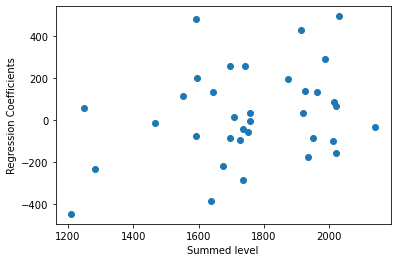

In [21]:
# Obtain summed level
summed_level = level_df.sum(axis = 0)[1:-1]

# Graph
plt.scatter(summed_level, linear_regression_coef.values())
plt.xlabel('Summed level')
plt.ylabel('Regression Coefficients')
plt.show()

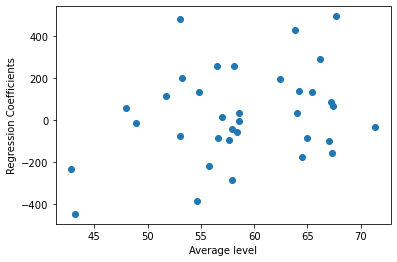

In [22]:
num_jobs_skill_relevant_for = []
# Get the count of non-Zeros values in column 'B'
for column_name in level_df.columns.values[1:-1]:
    count = (level_df[column_name] != 0).sum()
    num_jobs_skill_relevant_for.append(count)
    
# Obtain average level of each skill
average_level = np.divide(summed_level, num_jobs_skill_relevant_for)

# Graph
plt.scatter(average_level, linear_regression_coef.values())
plt.xlabel('Average level')
plt.ylabel('Regression Coefficients')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


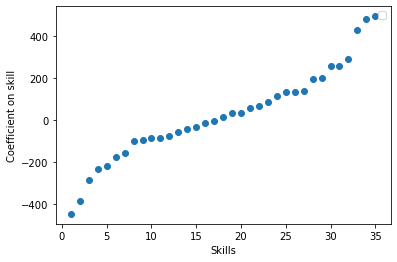

<Figure size 640x480 with 0 Axes>

dict_keys(['Installation', 'Repairing', 'Coordination', 'Equipment_Selection', 'Operation_and_Control', 'Learning_Strategies', 'Social_Perceptiveness', 'Mathematics', 'Management_of_Personnel_Resources', 'Speaking', 'Negotiation', 'Quality_Control_Analysis', 'Persuasion', 'Service_Orientation', 'Reading_Comprehension', 'Management_of_Material_Resources', 'Systems_Analysis', 'Operations_Monitoring', 'Instructing', 'Systems_Evaluation', 'Technology_Design', 'Science', 'Writing', 'Programming', 'Troubleshooting', 'Active_Listening', 'Complex_Problem_Solving', 'Monitoring', 'Equipment_Maintenance', 'Operations_Analysis', 'Time_Management', 'Active_Learning', 'Judgment_and_Decision_Making', 'Management_of_Financial_Resources', 'Critical_Thinking'])


In [23]:
# Sort the dictionary of coefficients in ascending order, and plot them out
# Creates a sorted list of tuples
sorted_coef = sorted(linear_regression_coef.items(), key = lambda kv: kv[1])

# Turns the sorted list of tuples into a dictionary
sorted_coef_dictionary = dict(sorted_coef)

# Linespace going from 0 to 
x = np.arange(1, 36)

# Plot 
plt.scatter(x, sorted_coef_dictionary.values())
plt.xlabel('Skills')
plt.ylabel('Coefficient on skill')
plt.legend()
from matplotlib.pyplot import figure
figure(figsize = (8, 6), dpi = 80)

# Give labels to each of the points plotted
# https://towardsdatascience.com/how-to-add-text-labels-to-scatterplot-in-matplotlib-seaborn-ec5df6afed7a
'''
for i in range(len(sorted_coef_dictionary)):
    plt.text(x = x[i] + 1, y = list(sorted_coef_dictionary.values())[i],
             s = list(sorted_coef_dictionary.keys())[i], 
             fontdict = dict(color = 'red', size = 10),
             bbox = dict(facecolor = 'yellow',alpha = 0.5))
'''
# Show the plot
plt.show()
print(sorted_coef_dictionary.keys())

In [24]:
# Find skills with coefficients larger than 200
for i in sorted_coef_dictionary:
    if sorted_coef_dictionary[i] > 200:
        print(i)

Equipment_Maintenance
Operations_Analysis
Time_Management
Active_Learning
Judgment_and_Decision_Making
Management_of_Financial_Resources
Critical_Thinking


In [25]:
# 5 skills with the highest expected payoff
top_5 = sorted(linear_regression_coef, key = linear_regression_coef.get, reverse = True)[:5]
print(top_5)

['Critical_Thinking', 'Management_of_Financial_Resources', 'Judgment_and_Decision_Making', 'Active_Learning', 'Time_Management']


In [26]:
# Code for finding the N largest elements
def find_N_max(lst, N):
    # Default N > 1
    out = []
    
    lst_copy = lst
    
    for i in range(N):
        largest = max(lst_copy)
        out.append(largest)
        lst_copy.remove(largest)
        
    return out

# code for find the index of the N largest elements
def find_index_N_max(lst, N):
    out = []
    
    make_list = list(lst)
    # For a sorted list
    temp = make_list
    
    for i in range(N):
        index = make_list.index(max(temp))
        out.append(index)
        temp.remove(max(temp))
    
    return out

In [27]:
# For the 5 skills with the largest expected payoff, find the top 3 jobs that they are most important for
highest_skill_job = dict()

for skill_name in top_5:
    # Obtain a slice of the column of the skill name
    column = level_df.loc[:, skill_name]
    # Get index of the top 3 level values
    indexes = find_index_N_max(column, 3)
    # Find job names, put into a list
    temp = level_df.loc[indexes, 'Occupation']
    # Add to dictionary
    highest_skill_job[skill_name] = list(temp)

# Show the dictioanry
for i in highest_skill_job:
    print(i, ':', highest_skill_job[i], '\n')

Critical_Thinking : ['Judges, Magistrate Judges, and Magistrates', 'Administrative Law Judges, Adjudicators, and Hearing Officers', 'Bicycle Repairers'] 

Management_of_Financial_Resources : ['Chief Executives', 'Travel Agents', 'Concierges'] 

Judgment_and_Decision_Making : ['Chief Executives', 'Administrative Law Judges, Adjudicators, and Hearing Officers', 'Actuaries'] 

Active_Learning : ['Physicists', 'Biochemists and Biophysicists', 'Mathematical Science Teachers, Postsecondary'] 

Time_Management : ['Chief Executives', 'Editors', 'First-Line Supervisors of Non-Retail Sales Workers'] 



In [28]:
# For these jobs, find their actual pay
for i in highest_skill_job:
    for job in highest_skill_job[i]:
        # Find this job's earning
        earnings = level_df.loc[level_df['Occupation'] == job, 'Annual Earnings']
        # Show them
        print(job, earnings.values[0])

Judges, Magistrate Judges, and Magistrates 141080.0
Administrative Law Judges, Adjudicators, and Hearing Officers 97520.0
Bicycle Repairers 32630.0
Chief Executives 185950.0
Travel Agents 42350.0
Concierges 32380.0
Chief Executives 185950.0
Administrative Law Judges, Adjudicators, and Hearing Officers 97520.0
Actuaries 111030.0
Physicists 129850.0
Biochemists and Biophysicists 94270.0
Mathematical Science Teachers, Postsecondary 73650.0
Chief Executives 185950.0
Editors 63400.0
First-Line Supervisors of Non-Retail Sales Workers 78560.0


In [29]:
# 5 skills with the lowest expected payoff
bottom_5 = sorted(linear_regression_coef, key = linear_regression_coef.get, reverse = False)[:5]
print(bottom_5)

['Installation', 'Repairing', 'Coordination', 'Equipment_Selection', 'Operation_and_Control']


In [30]:
# For the 5 skills with the lowest expected payoff, find the top 3 jobs that they are most important for
lowest_skill_job = dict()

for skill_name in bottom_5:
    # Obtain a slice of the column of the skill name
    column = level_df.loc[:, skill_name]
    # Get index of the top 3 level values
    indexes = find_index_N_max(column, 3)
    # Find job names, put into a list
    temp = level_df.loc[indexes, 'Occupation']
    # Add to dictionary
    lowest_skill_job[skill_name] = list(temp)

# Show the dictioanry
for i in lowest_skill_job:
    print(i, ':', lowest_skill_job[i], '\n')

Installation : ['Solar Thermal Installers and Technicians', 'Electricians', 'Healthcare Social Workers'] 

Repairing : ['Aircraft Mechanics and Service Technicians', 'Family Medicine Physicians', 'Aviation Inspectors'] 

Coordination : ['Chief Executives', 'Eligibility Interviewers, Government Programs', 'Lodging Managers'] 

Equipment_Selection : ['Robotics Engineers', 'Electrical and Electronics Repairers, Commercial and Industrial Equipment', 'Mining and Geological Engineers, Including Mining Safety Engineers'] 

Operation_and_Control : ['Airline Pilots, Copilots, and Flight Engineers', 'Coaches and Scouts', 'Library Science Teachers, Postsecondary'] 



In [31]:
print(regr.intercept_)

e = level_df['Annual Earnings']
print("min", e.min(), 'max', e.max(), 'mean', e.mean())

[75325.67087603]
min 27080.0 max 208000.0 mean 80890.25906735752


(array([56., 86., 90., 76., 36., 13.,  7.,  2.,  3., 17.]),
 array([ 27080.,  45172.,  63264.,  81356.,  99448., 117540., 135632.,
        153724., 171816., 189908., 208000.]),
 <BarContainer object of 10 artists>)

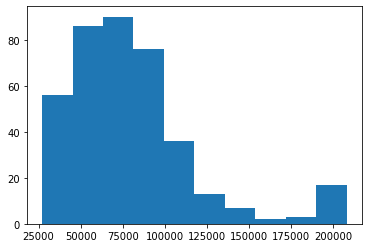

In [32]:
plt.hist(e)

In [33]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))


Mean squared error: 898367438.18
Coefficient of determination: 0.41


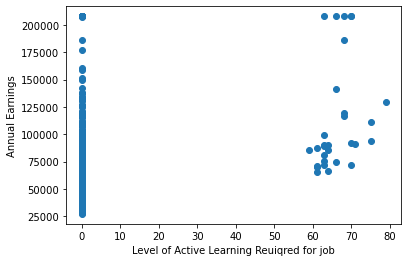

In [34]:
plt.scatter(level_df['Active_Learning'], level_df['Annual Earnings'])
plt.xlabel('Level of Active Learning Reuiqred for job')
plt.ylabel('Annual Earnings')
plt.show()

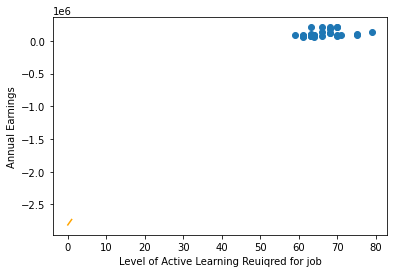

In [35]:
# Filter out the rows in our df that does not have a level of 0 for active learning
active_learning_not_zero_df = level_df.loc[level_df['Active_Learning'] != float(0.0)]

# plot
plt.scatter(active_learning_not_zero_df['Active_Learning'], active_learning_not_zero_df['Annual Earnings'])
plt.xlabel('Level of Active Learning Reuiqred for job')
plt.ylabel('Annual Earnings')

b1, b2, b0 = np.polyfit(x = active_learning_not_zero_df['Active_Learning'], y = active_learning_not_zero_df['Annual Earnings'], deg = 2)
ordered_x = np.linspace(0, 1)
plt.plot(ordered_x, b1*(ordered_x**2) + b2*ordered_x + b0, color = 'orange')

plt.show()

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

# guide:
# For choosing the loss & activation function
# https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8
# Loss function
# https://stats.stackexchange.com/questions/485400/what-is-the-loss-function-for-regression-using-artificial-neural-network

# define the keras model
model = Sequential()
model.add(Dense(300, input_dim = 35, activation = 'relu'))
model.add(Dense(600, activation = 'sigmoid'))
# If final activation function = linear, then output range = (-∞, ∞)
# If final activation function = relu, then output range = [0, ∞)
model.add(Dense(1, activation = 'relu'))

# Summarize the model
model.summary()

# compile the keras model
# Least squares = Mean squared error (MSE) — This finds the average squared difference between the predicted value and the true value
# Understanding loss function in Machine learning:
# https://www.section.io/engineering-education/understanding-loss-functions-in-machine-learning/#loss-functions-for-regression
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = 'mean_squared_error')

model.fit(X, y, epochs = 100, batch_size = 20, verbose = 0)
# evaluate the model
_, train_accuracy = model.evaluate(X, y)
print('Training Accuracy: %.2f' % (train_accuracy * 100))

2022-02-28 06:06:20.818072: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-28 06:06:20.933268: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               10800     
_________________________________________________________________
dense_1 (Dense)              (None, 600)               180600    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 601       
Total params: 192,001
Trainable params: 192,001
Non-trainable params: 0
_________________________________________________________________
13/13 [==============================] - 0s 1ms/step - loss: 7946879488.0000 - mean_squared_error: 7946879488.0000
Training Accuracy: 794687948800.00


# Try a classification model

In [37]:
# Separate into two classes
level_df['Earning class'] = level_df['Annual Earnings'] > 75180.0

y = level_df['Earning class'].to_numpy().reshape(-1, 1)

In [38]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim = 35, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# compile the keras model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [39]:
# fit the keras model on the dataset
model.fit(X, y, epochs = 100, verbose = 0, batch_size = 30)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy * 100))

13/13 [==============================] - 0s 918us/step - loss: 0.2746 - accuracy: 0.8731
Accuracy: 87.31


In [40]:
model.get_weights()

[array([[ 4.09332151e-03,  4.08020049e-01,  1.05135627e-02,
         -2.10107900e-02, -3.46820951e-01, -6.87396601e-02,
         -2.61191189e-01,  8.30797628e-02,  3.05389106e-01,
         -3.43584716e-01,  8.55643228e-02, -1.50603950e-01],
        [ 9.92585272e-02, -2.71208167e-01,  9.63222012e-02,
          2.00861782e-01, -1.76250577e-01, -2.48480499e-01,
         -3.61779243e-01, -1.39843151e-01,  2.42779404e-01,
          3.13858628e-01,  1.93542745e-02, -2.85509109e-01],
        [-5.07223830e-02,  1.80626035e-01, -7.40959644e-02,
          5.29456288e-02, -3.13361406e-01, -3.71239781e-02,
         -3.57237816e-01, -5.29590473e-02, -1.26740694e-01,
         -2.06946656e-01,  2.93861479e-01,  1.82417601e-01],
        [-3.37735474e-01, -2.28684083e-01, -1.38883501e-01,
          2.10950300e-01, -2.65888423e-01, -7.66807422e-02,
         -1.28757223e-01, -2.28580266e-01, -1.99963376e-01,
          3.21367085e-01, -8.44459608e-02, -2.92778730e-01],
        [-2.32656240e-01,  3.6989232

In [41]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 35),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_3_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_3',
    'trainable': True,
    'batch_input_shape': (None, 35),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_i